## AMAZON CLOSING STOCK PREDICITON

#### In this project we shall be forecasting Amazon closing stock prices using Neural Networks. This follows  from  our first project which used ARIMA model for forecasting. ARIMA model achieved an RMSE of 141.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load our datset
stock=pd.read_csv("/content/mydata.csv",parse_dates=['Date'])
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,...,Usd_Rub_Close,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close
0,2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,...,27.71,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688
1,2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,...,27.71,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273
2,2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,...,27.86,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078
3,2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,...,27.77,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883
4,2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,...,27.75,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961


## Data Exploration and Cleaning

In [3]:
# set our date column as index
stock.set_index('Date',inplace=True)

In [4]:
# checking for null values
stock.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
Gain               0
Loss               0
Avg_Gain           0
Avg_Loss           0
RSI                0
SMA                0
EMA                0
MACD               0
Bollinger_Upper    0
Bollinger_Lower    0
ROC                0
PVT                0
Usd_Eur_Close      0
Usd_Chf_Close      0
Usd_Gbp_Close      0
Usd_Jpy_Close      0
Usd_Cad_Close      0
Usd_Inf_Close      0
Usd_Rub_Close      0
Usd_Try_Close      0
IRX_Close          0
JPM_Close          0
BAC_Close          0
Citigroup_Close    0
WFC_Close          0
NASDAQ_Close       0
SP_500_Close       0
Dow_Jones_Close    0
dtype: int64

In [5]:
# check  and dropping duplicates
print(stock.duplicated().any())
stock.drop_duplicates()
stock.head()

False


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,Avg_Gain,...,Usd_Rub_Close,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,0.572143,...,27.71,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688
2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,0.528571,...,27.71,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273
2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,0.488571,...,27.86,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078
2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,0.488571,...,27.77,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883
2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,0.579286,...,27.75,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961


In [6]:
# Descriptive statistics on our dataset
stock.Close.describe()

count    3552.000000
mean      451.876593
std       527.147584
min        26.070000
25%        80.587500
50%       231.700000
75%       617.777500
max      2039.510000
Name: Close, dtype: float64

## Visualizing Daily Closing Stocks

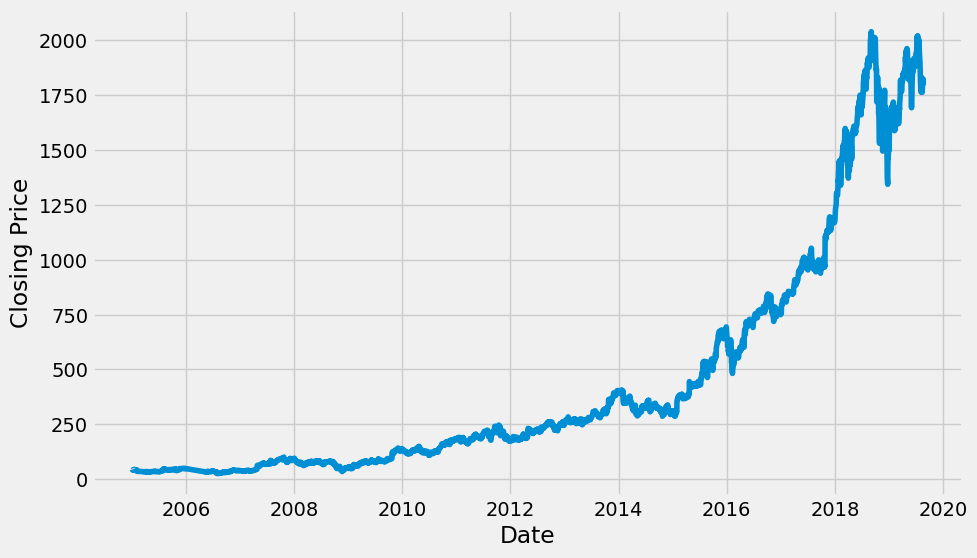

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(stock["Close"])
plt.show()

## Splitting into train and test

In [8]:
index=int(stock.shape[0]*0.8)
train=stock.iloc[:index]
test=stock.iloc[index:]
print(train.shape)
print(test.shape)

(2841, 35)
(711, 35)


In [9]:
# define a helper function that creates an array of closing stock values and reshapes to 2D
def create_array(df):
    dataset=df["Close"].values
    return np.reshape(dataset,(-1,1))

In [10]:
dataset_train=create_array(train)
dataset_test=create_array(test)
print(dataset_train.shape)
print(dataset_test.shape)

(2841, 1)
(711, 1)


**Normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler
# initialize our scaler
scaler=MinMaxScaler()

In [12]:
# fit the scaler on the training set only and use it to transform both train and test set
scaler.fit(dataset_train)
scaled_train=scaler.transform(dataset_train)
scaled_test=scaler.transform(dataset_test)

**Converting our Time Series to Supervised learning**

we will use a window of 365 days . where we make Closing stock of day 366 dependent on closing stock for the 365 days

In [13]:
window=365
def supervised_series(array):
  X=[]
  y=[]
  for i in range(window,len(array)):
    X.append(array[i-365:i,0])
    y.append(array[i,0])
  return X,y


In [14]:
# create X_train,y_train,X_test,y_test using our helper function
X_train,y_train=supervised_series(scaled_train)
X_test,y_test=supervised_series(scaled_test)

In [15]:
# Convert our X_train,X_test,y_train,y_test to the right format for LSTM
X_train,X_test,y_train,y_test=np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test),
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))
y_test=np.reshape(y_test,(y_test.shape[0],1))

**LSTM MODEL**

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [17]:
# initialising the model
from keras import metrics
model=Sequential()
# Adding LSTM layers
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(Flatten())
model.add(Dense(25))
# output layer
model.add(Dense(1))
# compiling the model
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=[metrics.MeanAbsoluteError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 365, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 365, 50)           20200     
                                                                 
 flatten (Flatten)           (None, 18250)             0         
                                                                 
 dense (Dense)               (None, 25)                456275    
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 486901 (1.86 MB)
Trainable params: 486901 (1.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
import tensorflow as tf
# early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# fitting the model
model.fit(X_train,
         y_train,
         batch_size=16,
         epochs=50,
          callbacks=[callback])

Epoch 1/50
155/155 [==============================] - 67s 354ms/step - loss: 0.0184 - mean_absolute_error: 0.0663
Epoch 2/50
155/155 [==============================] - 48s 309ms/step - loss: 0.0011 - mean_absolute_error: 0.0221
Epoch 3/50
155/155 [==============================] - 47s 303ms/step - loss: 7.8124e-04 - mean_absolute_error: 0.0191
Epoch 4/50
155/155 [==============================] - 46s 296ms/step - loss: 7.7852e-04 - mean_absolute_error: 0.0198
Epoch 5/50
155/155 [==============================] - 47s 304ms/step - loss: 6.2214e-04 - mean_absolute_error: 0.0173
Epoch 6/50
155/155 [==============================] - 47s 305ms/step - loss: 6.2758e-04 - mean_absolute_error: 0.0171
Epoch 7/50
155/155 [==============================] - 46s 296ms/step - loss: 6.9295e-04 - mean_absolute_error: 0.0180
Epoch 8/50
155/155 [==============================] - 46s 294ms/step - loss: 5.4945e-04 - mean_absolute_error: 0.0169
Epoch 9/50
155/155 [==============================] - 49s 315ms/

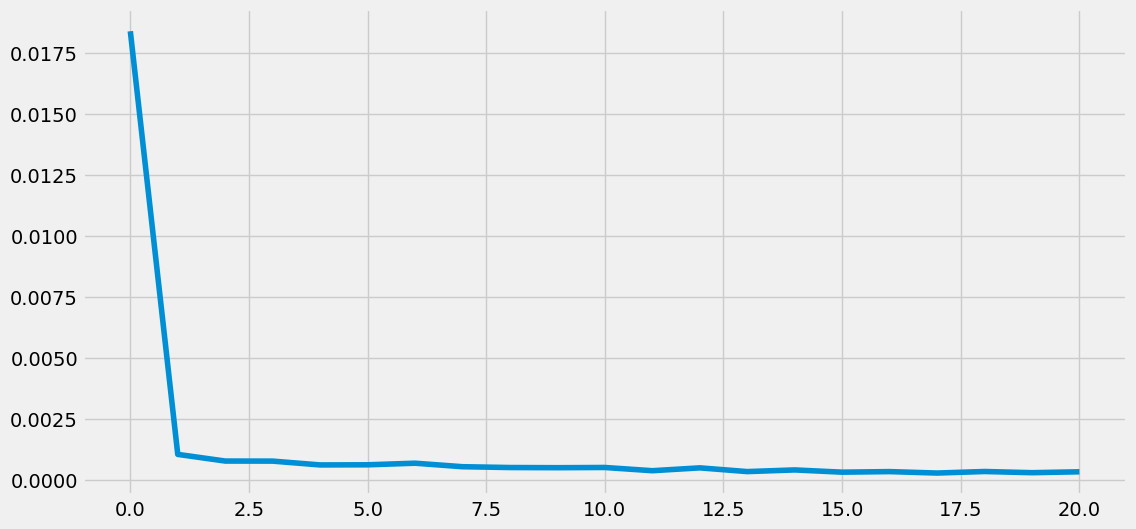

In [19]:
history=model.history.history["loss"]
plt.figure(figsize=(12,6))
plt.plot(range(len(history)),history)

In [20]:
# predictions with X_test data
prediction = model.predict(X_test)

11/11 [==============================] - 2s 83ms/step


**Transforming Our Predicted Values back to Original Scale**

In [21]:
predictions = scaler.inverse_transform(prediction)

In [23]:
df=pd.DataFrame(predictions)
df.index=test.index[365:]
df

,0
Date,
2018-04-09,1340.820435
2018-04-10,1327.602905
2018-04-11,1319.969727
2018-04-12,1317.472900
2018-04-13,1320.277222
...,...
2019-08-16,1793.953979
2019-08-19,1778.725830
2019-08-20,1765.087280


**Visualizing our Predicted data**

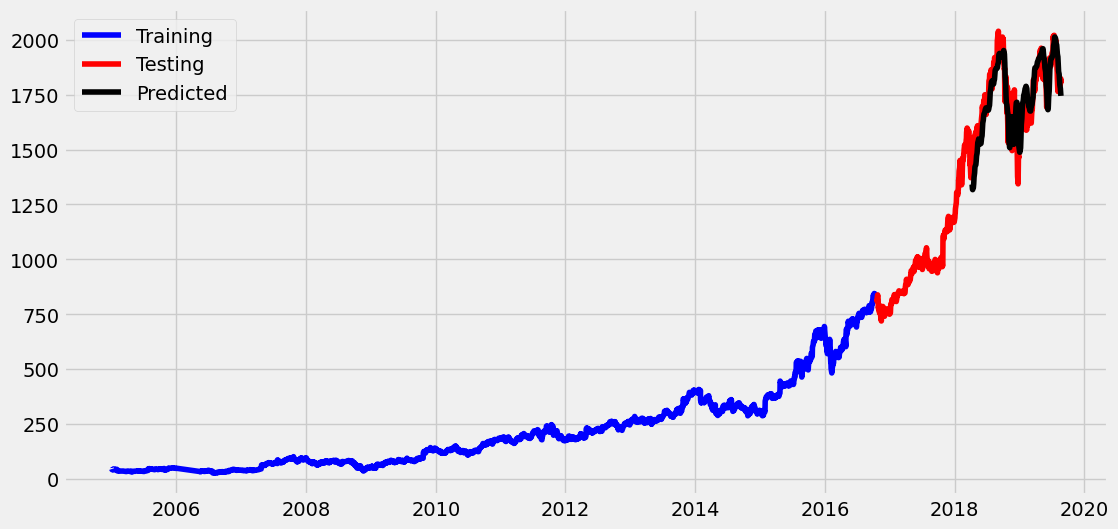

In [27]:
plt.figure(figsize=(12,6))
plt.plot(train["Close"],color='blue',label='Training')
plt.plot(test["Close"],color='red',label='Testing')
plt.plot(df,color='black',label='Predicted')
plt.legend()

In [30]:
# Model RMSE
error=mean_squared_error(test["Close"][365:],predictions)
print(error**0.5)

86.13439654522283


### Our model scored an RMSE of 86 which is a significant improvement from ARIMA model which scored 141.

In [1]:
!jupyter nbconvert --to webpdf --allow-chromium-download AMAZON_STOCK_.ipynb

[NbConvertApp] Converting notebook AMAZON_STOCK_.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 306164 bytes to AMAZON_STOCK_.pdf
